# Evaporation from CoAgMET data
*M. Vremec, University of Graz, 2021*

In this notebook it is shown how to compute (reference) evaporation ($E_0$) from meteorological data observed by the Colorado State University (CoAgMET) at Holyoke in Colorado, USA. The notebook also includes a comparison between $E_0$ estimated using *pyet* (FAO56) and $E_0$ available from CoAgMET. According to CoAgMET documentation, the provided reference evaporation is estimated using ASCE reference evaporation for short reference grass (Wright, 2000), which corresponds to the FAO-56 method used with *pyet*.

Source: https://coagmet.colostate.edu/station/selector

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyet as pyet
pyet.show_versions()

Python version: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Numpy version: 1.21.5
Scipy version: 1.7.3
Pandas version: 1.4.2
Matplotlib version: 3.5.1
Pyet version: 1.1.0b


## 1. Load CoAgMET Data

In [2]:
data = pd.read_csv("data/et_coagmet.txt", parse_dates=True, index_col="date")
data

,name,tavg,tmax,tmin,rhmax,rhmin,solar,windrun,et_asce,et_pk,et_asce0
date,,,,,,,,,,,
2020-01-01,hyk02,-0.8,9.4,-8.9,0.929,0.470,63.1,203.1,1.9,1.9,1.2
2020-01-02,hyk02,0.8,7.2,-4.2,0.902,0.568,107.4,314.7,1.7,1.7,1.1
2020-01-03,hyk02,-0.4,5.0,-4.7,0.855,0.448,76.2,239.6,1.7,1.3,1.1
2020-01-04,hyk02,4.1,16.1,-4.8,0.893,0.224,97.6,253.7,4.0,1.7,2.4
2020-01-05,hyk02,0.5,8.2,-6.9,0.820,0.232,102.3,312.2,3.1,1.9,1.9
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,hyk02,2.2,8.9,-6.2,0.967,0.318,98.6,324.5,2.8,1.6,1.7
2020-12-28,hyk02,-4.0,0.0,-10.1,0.994,0.878,26.2,248.3,0.4,0.6,0.3
2020-12-29,hyk02,-4.7,-1.1,-10.8,0.983,0.737,55.6,441.7,0.8,0.6,0.5


In [3]:
e0_coagmet = data["et_asce0"]

meteo = pd.DataFrame({"tmean":data["tavg"], 
                      "tmax":data["tmax"],
                      "tmin":data["tmin"], 
                      "rhmax":data["rhmax"]*100,
                      "rhmin":data["rhmin"]*100, 
                      "u2":data["windrun"]*1000/86400,
                      "rs":data["solar"]*86400/1000000})

tmean, tmax, tmin, rhmax, rhmin, wind, rs = [meteo[col] for col in meteo.columns]
lat = 40.49*np.pi/180

## 2. Comparison: pyet FAO56 vs CoAgMET ASCE 

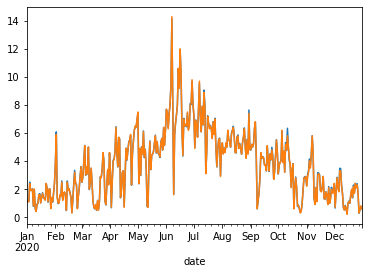

In [4]:
e0_fao56 = pyet.pm_fao56(tmean, wind, rs=rs, elevation=1138, lat=lat, 
                         tmax=tmax, tmin=tmin, rhmax=rhmax, rhmin=rhmin)

e0_fao56.plot()
e0_coagmet.plot();

## 3. Plot the results

We now plot the evaporation time series against each other to see how these compare. 

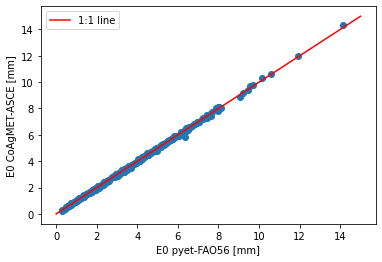

In [5]:
plt.scatter(e0_fao56, e0_coagmet)
plt.plot([0,15],[0,15], color="red", label="1:1 line")
plt.legend()
plt.xlabel("E0 pyet-FAO56 [mm]")
plt.ylabel("E0 CoAgMET-ASCE [mm]");